# BOSA Hackaton Skiing
Make sure you download the data into your Jupyter Notebook by executing the following block(s).

# Training session information
During the training, there were 5 athletes present. One by one, they came down the track, performing a salom. Across the track, 4 WASPs were postioned, from the start 'till the last curve. A 5th WASP was put at the bottom of the track as an extra streaming point.

Because athletes came down the track one by one, they had to wait at the top until the track was clear again. During the exercise, athletes that were finished waited at the bottom of the track, close to WASP 5.

All information about the session can be found in 'session.json' file.

In [1]:
# Download session information (from json file): 
!wget https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/session_info.json


--2022-09-08 13:43:56--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/session_info.json
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5276 (5,2K) [application/json]
Saving to: ‘session_info.json.1’

session_info.json.1 100%[===================>]   5,15K  --.-KB/s    in 0s      

2022-09-08 13:43:56 (104 MB/s) - ‘session_info.json.1’ saved [5276/5276]



In [1]:
import os
import json
from datetime import datetime

import pandas as pd

In [2]:
## Constants
CURRENT_DIR = os.getcwd()
DATA_DIR = CURRENT_DIR + "/data"
SERVERTIME_FORMAT = "%Y-%m-%dT%H:%M:%S.%fZ"

In [3]:
print(CURRENT_DIR)
print(DATA_DIR)

/home/ngomes/Documents/education/summer-schools/2022+becoming-an-olympian-in-sports-analytics/hackathon
/home/ngomes/Documents/education/summer-schools/2022+becoming-an-olympian-in-sports-analytics/hackathon/data


### Load general info about session
Get info for each athlete of the recorded session. The function below returns a list with all info of the training session structured per athlete:
Example: 
```json
{
  'name': 'Stef',
  'id': '62fe429c184ff6aec9ad538c',
  'sensors': ['heartrate'],
  'run_info': 
      {
        'name': 'Run 1 - Stef',
        'startTime': '2022-08-19T09:47:06.288Z',
        'endTime': '2022-08-19T09:47:27.297Z',
        'id': '62ff5c1a3e4d6070537dba9c'
      }
}
```
containing the following fields:
- name: name of the athlete
- id: database id of the athlete
- sensors: list of sensors worn by the athlete during training for which data is available
- run_info: indiciating the start- and endtime of the run of that athlete during training. These time properties are strings. You can convert them to a timestamp by applying the 'convert_string_to_timestamp' function (defined below).

**Remark:**: the start- and endtime of each run is taken manually, so not 100% accurate. To be sure, take 10s before (starttime -10s) and 10s after (endtime +10s ) when cutting the data.

In [134]:
def get_athlete_session_info():
  # Open file and read in session_info.json
  f = open('session-info.json')
  data = json.load(f)
  f.close()

  # Structure info per athlete
  athletes_sessioninfo = []
  for idx, a in enumerate(data['athletes']):
    temp = {'name': a['name'], 
            'id': a['id']}
    temp['sensors'] = [s['sensorType'] for s in a['sensors']]
    temp['run_info'] = [segm for i, segm in enumerate(data['segments']) if a['name'] in segm['name']][0]
    athletes_sessioninfo.append(temp)
  return athletes_sessioninfo

In [6]:
aths = get_athlete_session_info()
aths

[{'name': 'Stef',
  'id': '62fe429c184ff6aec9ad538c',
  'sensors': ['heartrate'],
  'run_info': {'name': 'Run 1 - Stef',
   'startTime': '2022-08-19T09:47:06.288Z',
   'endTime': '2022-08-19T09:47:27.297Z',
   'id': '62ff5c1a3e4d6070537dba9c'}},
 {'name': 'Vico',
  'id': '62fe42a1184ff6aec9ad538d',
  'sensors': ['heartrate'],
  'run_info': {'name': 'Run 3 - Vico',
   'startTime': '2022-08-19T09:48:08.583Z',
   'endTime': '2022-08-19T09:48:32.361Z',
   'id': '62ff5c583e4d6070537e15ea'}},
 {'name': 'Naya',
  'id': '62fe4256184ff6aec9ad5388',
  'sensors': ['heartrate', 'runningpod'],
  'run_info': {'name': 'Run 2 - Naya',
   'startTime': '2022-08-19T09:47:36.258Z',
   'endTime': '2022-08-19T09:48:03.735Z',
   'id': '62ff5c383e4d6070537de4cb'}},
 {'name': 'Christos',
  'id': '62fe4298184ff6aec9ad538b',
  'sensors': ['heartrate', 'runningpod', 'moxy'],
  'run_info': {'name': 'Run 4 - Christos',
   'startTime': '2022-08-19T09:48:41.989Z',
   'endTime': '2022-08-19T09:49:10.674Z',
   'id': '6

### Download sensor data

In [135]:
# Download sensor data for one specific athlete (by using its id and a sensor name)
def get_sensor_data(athlete_name: str, athlete_id: str, athlete_sensor: str):
  """
  You can download sensor data for one athlete in specific by using the function
  below. You need to specify the following things:
    - athlete_name
    - athlete_id
  and then the sensor you want to download the data from:
    - athlete_sensor
    
  **!Remark:** You can check which sensors are available for which athlete by
  looking at the athlete_session_info.
  """
  file_name = f'{athlete_name}_{athlete_sensor}_data.csv'
  uri = f'https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/{athlete_id}/{athlete_sensor}_data.csv'
  os.system(f'wget {uri} -O {file_name}')
  df = pd.read_csv(f'{file_name}', index_col=0)
  return df

In [107]:
df_stef_hr = get_sensor_data("Stef", "62fe429c184ff6aec9ad538c", "heartrate")
df_stef_hr.head()

--2022-09-08 17:54:36--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe429c184ff6aec9ad538c/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49052 (48K) [text/csv]
Saving to: ‘Stef_heartrate_data.csv’

     0K .......... .......... .......... .......... .......   100% 6,21M=0,008s

2022-09-08 17:54:36 (6,21 MB/s) - ‘Stef_heartrate_data.csv’ saved [49052/49052]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,125.0,-38,NaN,-51,NaN,NaN
1,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,124.0,-44,NaN,-51,NaN,NaN
2,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,123.0,-48,NaN,-51,NaN,NaN
3,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,122.0,-49,NaN,-51,NaN,NaN
4,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,121.0,-51,NaN,-51,NaN,NaN


In [12]:
df_vico_hr = get_sensor_data("Vico", "62fe42a1184ff6aec9ad538d", "heartrate")
df_vico_hr.head()

--2022-09-08 13:55:22--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe42a1184ff6aec9ad538d/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52814 (52K) [text/csv]
Saving to: ‘Vico_heartrate_data.csv’

     0K .......... .......... .......... .......... .......... 96% 3,49M 0s
    50K .                                                     100% 2,94T=0,01s

2022-09-08 13:55:22 (3,60 MB/s) - ‘Vico_heartrate_data.csv’ saved [52814/52814]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-37,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-39,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-49,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,108.0,-49,NaN,NaN,NaN,NaN


In [13]:
df_naya_hr = get_sensor_data("Naya", "62fe4256184ff6aec9ad5388", "heartrate")
df_naya_hr.head()

--2022-09-08 13:55:29--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4256184ff6aec9ad5388/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46093 (45K) [text/csv]
Saving to: ‘Naya_heartrate_data.csv’

     0K .......... .......... .......... .......... .....     100% 3,38M=0,01s

2022-09-08 13:55:30 (3,38 MB/s) - ‘Naya_heartrate_data.csv’ saved [46093/46093]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,127.0,-43,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,126.0,-44,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,125.0,-52,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,124.0,-44,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,123.0,-40,NaN,NaN,NaN,NaN


In [14]:
df_naya_rp = get_sensor_data("Naya", "62fe4256184ff6aec9ad5388", "runningpod")
df_naya_rp.head()

--2022-09-08 13:55:33--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4256184ff6aec9ad5388/runningpod_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2727588 (2,6M) [text/csv]
Saving to: ‘Naya_runningpod_data.csv’

     0K .......... .......... .......... .......... ..........  1% 5,33M 0s
    50K .......... .......... .......... .......... ..........  3% 4,04M 1s
   100K .......... .......... .......... .......... ..........  5% 4,34M 1s
   150K .......... .......... .......... .......... ..........  7% 1,81M 1s
   200K .......... .......... .......... .......... ..........  9% 5,89M 1s
   250K .......... .......... .......... .......... .......... 11% 8,92M 1s
   300K .......... .......... .....

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4292184ff6aec9ad538a,Cadence,0.25,-33,-51,-54,NaN,NaN
1,1.660895e+09,62fe4292184ff6aec9ad538a,GroundContactTime,0.00,-33,-51,-54,NaN,NaN
2,1.660895e+09,62fe4292184ff6aec9ad538a,Steps,0.00,-33,-51,-54,NaN,NaN
3,1.660895e+09,62fe4292184ff6aec9ad538a,VerticalOscillation,0.00,-33,-51,-54,NaN,NaN
4,1.660895e+09,62fe4292184ff6aec9ad538a,Walking,0.00,-33,-51,-54,NaN,NaN


In [15]:
df_christos_hr = get_sensor_data("Christos",  "62fe4298184ff6aec9ad538b", "heartrate")
df_christos_hr.head()

--2022-09-08 13:55:38--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4298184ff6aec9ad538b/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51638 (50K) [text/csv]
Saving to: ‘Christos_heartrate_data.csv’

     0K .......... .......... .......... .......... .......... 99% 6,72M 0s
    50K                                                       100%  816G=0,007s

2022-09-08 13:55:38 (6,78 MB/s) - ‘Christos_heartrate_data.csv’ saved [51638/51638]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


In [16]:
df_christos_rp = get_sensor_data("Christos",  "62fe4298184ff6aec9ad538b", "runningpod")
df_christos_rp.head()

--2022-09-08 13:55:41--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4298184ff6aec9ad538b/runningpod_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2480790 (2,4M) [text/csv]
Saving to: ‘Christos_runningpod_data.csv’

     0K .......... .......... .......... .......... ..........  2% 5,63M 0s
    50K .......... .......... .......... .......... ..........  4% 4,42M 0s
   100K .......... .......... .......... .......... ..........  6% 4,34M 0s
   150K .......... .......... .......... .......... ..........  8% 8,68M 0s
   200K .......... .......... .......... .......... .......... 10% 3,80M 0s
   250K .......... .......... .......... .......... .......... 12% 4,09M 0s
   300K .......... .......... .

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42bf184ff6aec9ad538f,Cadence,0.0,-33,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42bf184ff6aec9ad538f,GroundContactTime,0.0,-33,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42bf184ff6aec9ad538f,Steps,0.0,-33,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42bf184ff6aec9ad538f,VerticalOscillation,0.0,-33,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42bf184ff6aec9ad538f,Walking,0.0,-33,NaN,NaN,NaN,NaN


In [18]:
df_christos_mx = get_sensor_data("Christos",  "62fe4298184ff6aec9ad538b", "moxy")
df_christos_mx.head()

--2022-09-08 13:55:51--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4298184ff6aec9ad538b/moxy_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 664665 (649K) [text/csv]
Saving to: ‘Christos_moxy_data.csv’

     0K .......... .......... .......... .......... ..........  7% 2,44M 0s
    50K .......... .......... .......... .......... .......... 15% 3,49M 0s
   100K .......... .......... .......... .......... .......... 23% 5,47M 0s
   150K .......... .......... .......... .......... .......... 30% 8,18M 0s
   200K .......... .......... .......... .......... .......... 38% 6,28M 0s
   250K .......... .......... .......... .......... .......... 46% 3,86M 0s
   300K .......... .......... .......... ...

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62ff3995354557bbc6718e7f,TotalHbConcentration,12.580000,-46,NaN,NaN,NaN,NaN
1,1.660895e+09,62ff3995354557bbc6718e7f,CurrentSaturatedHb,48.299999,-46,NaN,NaN,NaN,NaN
2,1.660895e+09,62ff3995354557bbc6718e7f,PreviousSaturatedHb,48.000000,-46,NaN,NaN,NaN,NaN
3,1.660895e+09,62ff3995354557bbc6718e7f,AmbientLightTooHigh,0.000000,-46,NaN,NaN,NaN,NaN
4,1.660895e+09,62ff3995354557bbc6718e7f,TotalHbConcentration,12.580000,-46,NaN,NaN,NaN,NaN


In [21]:
df_ioannis_hr = get_sensor_data("Ioannis",  "62fe4227184ff6aec9ad5385", "heartrate")
df_ioannis_hr.head()

--2022-09-08 13:59:43--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4227184ff6aec9ad5385/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51496 (50K) [text/csv]
Saving to: ‘Ioannis_heartrate_data.csv’

     0K .......... .......... .......... .......... .......... 99% 8,28M 0s
    50K                                                       100%  551G=0,006s

2022-09-08 13:59:43 (8,33 MB/s) - ‘Ioannis_heartrate_data.csv’ saved [51496/51496]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-36,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-33,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-34,NaN,NaN,NaN,NaN


In [22]:
df_ioannis_rp = get_sensor_data("Ioannis",  "62fe4227184ff6aec9ad5385", "runningpod")
df_ioannis_rp.head()

--2022-09-08 13:59:54--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4227184ff6aec9ad5385/runningpod_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2091143 (2,0M) [text/csv]
Saving to: ‘Ioannis_runningpod_data.csv’

     0K .......... .......... .......... .......... ..........  2% 3,40M 1s
    50K .......... .......... .......... .......... ..........  4% 5,68M 0s
   100K .......... .......... .......... .......... ..........  7% 1,58M 1s
   150K .......... .......... .......... .......... ..........  9% 6,13M 1s
   200K .......... .......... .......... .......... .......... 12% 6,81M 0s
   250K .......... .......... .......... .......... .......... 14% 5,16M 0s
   300K .......... .......... ..

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe424f184ff6aec9ad5387,Cadence,0.25,-41,-51,NaN,NaN,NaN
1,1.660895e+09,62fe424f184ff6aec9ad5387,GroundContactTime,0.00,-41,-51,NaN,NaN,NaN
2,1.660895e+09,62fe424f184ff6aec9ad5387,Steps,8.00,-41,-51,NaN,NaN,NaN
3,1.660895e+09,62fe424f184ff6aec9ad5387,VerticalOscillation,0.00,-41,-51,NaN,NaN,NaN
4,1.660895e+09,62fe424f184ff6aec9ad5387,Walking,0.00,-41,-51,NaN,NaN,NaN


### Correct Christos' HR time data

We were told that the time data for Christos  was displaced by $30\,\text{s}$, so a correction of that amount is needed

In [117]:
print(df_christos_hr['time'][0])
print(df_christos_hr['time'][1])

1660895143.574
1660895144.359


In [118]:
df_christos_hr['time'] = df_christos_hr['time'] - 30
print(df_christos_hr['time'][0])
print(df_christos_hr['time'][1])

1660895113.574
1660895114.359


### Build HR data-frame

In [119]:
# HRs
chr_hr = df_christos_hr[df_christos_hr['sensor_measure'] == 'ComputedHeartrate']['sensor_value'].values
ste_hr = df_stef_hr[df_stef_hr['sensor_measure'] == 'ComputedHeartrate']['sensor_value'].values
vic_hr = df_vico_hr[df_vico_hr['sensor_measure'] == 'ComputedHeartrate']['sensor_value'].values
nay_hr = df_naya_hr[df_naya_hr['sensor_measure'] == 'ComputedHeartrate']['sensor_value'].values
ioa_hr = df_ioannis_hr[df_ioannis_hr['sensor_measure'] == 'ComputedHeartrate']['sensor_value'].values

print(len(chr_hr), len(ste_hr), len(vic_hr), len(nay_hr), len(ioa_hr))

614 572 611 550 608


In [120]:
# times
chr_thr = df_christos_hr[df_christos_hr['sensor_measure'] == 'ComputedHeartrate']['time'].values
ste_thr = df_stef_hr[df_stef_hr['sensor_measure'] == 'ComputedHeartrate']['time'].values
vic_thr = df_vico_hr[df_vico_hr['sensor_measure'] == 'ComputedHeartrate']['time'].values
nay_thr = df_naya_hr[df_naya_hr['sensor_measure'] == 'ComputedHeartrate']['time'].values
ioa_thr = df_ioannis_hr[df_ioannis_hr['sensor_measure'] == 'ComputedHeartrate']['time'].values

print(len(chr_thr), len(ste_thr), len(vic_thr), len(nay_thr), len(ioa_thr))

614 572 611 550 608


In [121]:
# convert times
chr_thhr = chr_thr.astype('datetime64[s]').tolist()
ste_thhr = ste_thr.astype('datetime64[s]').tolist()
vic_thhr = vic_thr.astype('datetime64[s]').tolist()
nay_thhr = nay_thr.astype('datetime64[s]').tolist()
ioa_thhr = ioa_thr.astype('datetime64[s]').tolist()

In [122]:
maxlen = max(len(chr_hr), len(ste_hr), len(vic_hr), len(nay_hr), len(ioa_hr))

chr_hr = np.append(chr_hr, np.repeat(np.nan, maxlen - len(chr_hr)))
ste_hr = np.append(ste_hr, np.repeat(np.nan, maxlen - len(ste_hr)))
vic_hr = np.append(vic_hr, np.repeat(np.nan, maxlen - len(vic_hr)))
nay_hr = np.append(nay_hr, np.repeat(np.nan, maxlen - len(nay_hr)))
ioa_hr = np.append(ioa_hr, np.repeat(np.nan, maxlen - len(ioa_hr)))

print(len(chr_hr), len(ste_hr), len(vic_hr), len(nay_hr), len(ioa_hr))

614 614 614 614 614


In [123]:
# thr
chr_thr = np.append(chr_thr, np.repeat(np.nan, maxlen - len(chr_thr)))
ste_thr = np.append(ste_thr, np.repeat(np.nan, maxlen - len(ste_thr)))
vic_thr = np.append(vic_thr, np.repeat(np.nan, maxlen - len(vic_thr)))
nay_thr = np.append(nay_thr, np.repeat(np.nan, maxlen - len(nay_thr)))
ioa_thr = np.append(ioa_thr, np.repeat(np.nan, maxlen - len(ioa_thr)))

print(len(chr_thr), len(ste_thr), len(vic_thr), len(nay_thr), len(ioa_thr))

614 614 614 614 614


In [124]:
# thhr
chr_thhr = np.append(chr_thhr, np.repeat(np.nan, maxlen - len(chr_thhr)))
ste_thhr = np.append(ste_thhr, np.repeat(np.nan, maxlen - len(ste_thhr)))
vic_thhr = np.append(vic_thhr, np.repeat(np.nan, maxlen - len(vic_thhr)))
nay_thhr = np.append(nay_thhr, np.repeat(np.nan, maxlen - len(nay_thhr)))
ioa_thhr = np.append(ioa_thhr, np.repeat(np.nan, maxlen - len(ioa_thhr)))

print(len(chr_thhr), len(ste_thhr), len(vic_thhr), len(nay_thhr), len(ioa_thhr))

614 614 614 614 614


In [125]:
hr_dict = {
  'tchr': chr_thr,
  'dtchr': chr_thhr,
  'Christos': chr_hr,
  'tste': ste_thr,
  'dtste': ste_thhr,
  'Stef': ste_hr,
  'tvic': vic_thr,
  'dtvic': vic_thhr,
  'Vico': vic_hr,
  'tnay': nay_thr,
  'dtnay': nay_thhr,
  'Naya': nay_hr,
  'tioa': ioa_thr,
  'dtioa': ioa_thhr,
  'Ioannis': ioa_hr
}
df_hr= pd.DataFrame(hr_dict)
df_hr

,tchr,dtchr,Christos,tste,dtste,Stef,tvic,dtvic,Vico,tnay,dtnay,Naya,tioa,dtioa,Ioannis
0,1.660895e+09,2022-08-19 07:45:13,98.0,1.660895e+09,2022-08-19 07:45:43,125.0,1.660895e+09,2022-08-19 07:45:43,109.0,1.660895e+09,2022-08-19 07:45:43,127.0,1.660895e+09,2022-08-19 07:45:43,88.0
1,1.660895e+09,2022-08-19 07:45:14,99.0,1.660895e+09,2022-08-19 07:45:44,124.0,1.660895e+09,2022-08-19 07:45:43,109.0,1.660895e+09,2022-08-19 07:45:44,126.0,1.660895e+09,2022-08-19 07:45:43,88.0
2,1.660895e+09,2022-08-19 07:45:14,99.0,1.660895e+09,2022-08-19 07:45:44,123.0,1.660895e+09,2022-08-19 07:45:44,109.0,1.660895e+09,2022-08-19 07:45:44,125.0,1.660895e+09,2022-08-19 07:45:44,88.0
3,1.660895e+09,2022-08-19 07:45:14,99.0,1.660895e+09,2022-08-19 07:45:45,122.0,1.660895e+09,2022-08-19 07:45:44,109.0,1.660895e+09,2022-08-19 07:45:45,124.0,1.660895e+09,2022-08-19 07:45:44,88.0
4,1.660895e+09,2022-08-19 07:45:15,98.0,1.660895e+09,2022-08-19 07:45:45,121.0,1.660895e+09,2022-08-19 07:45:44,108.0,1.660895e+09,2022-08-19 07:45:45,123.0,1.660895e+09,2022-08-19 07:45:44,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.660895e+09,2022-08-19 07:49:30,137.0,NaN,NaT,NaN,1.660895e+09,2022-08-19 07:50:01,122.0,NaN,NaT,NaN,NaN,NaT,NaN
610,1.660895e+09,2022-08-19 07:49:30,136.0,NaN,NaT,NaN,1.660895e+09,2022-08-19 07:50:01,122.0,NaN,NaT,NaN,NaN,NaT,NaN
611,1.660895e+09,2022-08-19 07:49:30,136.0,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
612,1.660895e+09,2022-08-19 07:49:31,136.0,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN


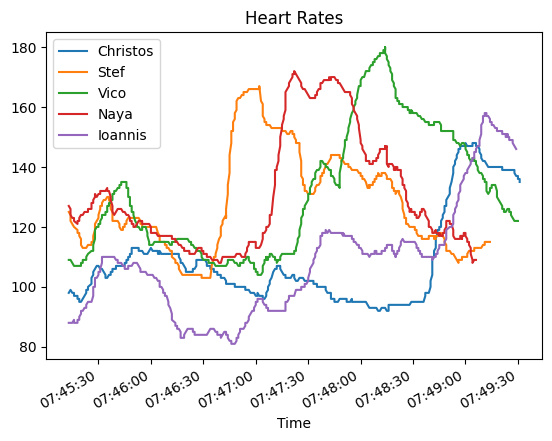

In [129]:
df_hr.plot(
  'dtchr',
  y= ['Christos', 'Stef', 'Vico', 'Naya', 'Ioannis'],
  xlabel= "Time",
  title= "Heart Rates"
);

In [130]:
df_hr.to_csv("data/heart-rates.csv")

In [131]:
df_hr= pd.read_csv("data/heart-rates.csv", index_col= 0)
df_hr

,tchr,dtchr,Christos,tste,dtste,Stef,tvic,dtvic,Vico,tnay,dtnay,Naya,tioa,dtioa,Ioannis
0,1.660895e+09,2022-08-19 07:45:13,98.0,1.660895e+09,2022-08-19 07:45:43,125.0,1.660895e+09,2022-08-19 07:45:43,109.0,1.660895e+09,2022-08-19 07:45:43,127.0,1.660895e+09,2022-08-19 07:45:43,88.0
1,1.660895e+09,2022-08-19 07:45:14,99.0,1.660895e+09,2022-08-19 07:45:44,124.0,1.660895e+09,2022-08-19 07:45:43,109.0,1.660895e+09,2022-08-19 07:45:44,126.0,1.660895e+09,2022-08-19 07:45:43,88.0
2,1.660895e+09,2022-08-19 07:45:14,99.0,1.660895e+09,2022-08-19 07:45:44,123.0,1.660895e+09,2022-08-19 07:45:44,109.0,1.660895e+09,2022-08-19 07:45:44,125.0,1.660895e+09,2022-08-19 07:45:44,88.0
3,1.660895e+09,2022-08-19 07:45:14,99.0,1.660895e+09,2022-08-19 07:45:45,122.0,1.660895e+09,2022-08-19 07:45:44,109.0,1.660895e+09,2022-08-19 07:45:45,124.0,1.660895e+09,2022-08-19 07:45:44,88.0
4,1.660895e+09,2022-08-19 07:45:15,98.0,1.660895e+09,2022-08-19 07:45:45,121.0,1.660895e+09,2022-08-19 07:45:44,108.0,1.660895e+09,2022-08-19 07:45:45,123.0,1.660895e+09,2022-08-19 07:45:44,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.660895e+09,2022-08-19 07:49:30,137.0,NaN,NaN,NaN,1.660895e+09,2022-08-19 07:50:01,122.0,NaN,NaN,NaN,NaN,NaN,NaN
610,1.660895e+09,2022-08-19 07:49:30,136.0,NaN,NaN,NaN,1.660895e+09,2022-08-19 07:50:01,122.0,NaN,NaN,NaN,NaN,NaN,NaN
611,1.660895e+09,2022-08-19 07:49:30,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,1.660895e+09,2022-08-19 07:49:31,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Execute and fetch data

In [137]:
# Get a list of all athletes and their sensor information
athletes = get_athlete_session_info()

In [16]:
# Select the first athlete in the list
current_athlete = athletes[0]
current_athlete

{'name': 'Stef',
 'id': '62fe429c184ff6aec9ad538c',
 'sensors': ['heartrate'],
 'run_info': {'name': 'Run 1 - Stef',
  'startTime': '2022-08-19T09:47:06.288Z',
  'endTime': '2022-08-19T09:47:27.297Z',
  'id': '62ff5c1a3e4d6070537dba9c'}}

In [147]:
stef = athletes[0]
stef

{'name': 'Stef',
 'id': '62fe429c184ff6aec9ad538c',
 'sensors': ['heartrate'],
 'run_info': {'name': 'Run 1 - Stef',
  'startTime': '2022-08-19T09:47:06.288Z',
  'endTime': '2022-08-19T09:47:27.297Z',
  'id': '62ff5c1a3e4d6070537dba9c'}}

In [148]:
vico = athletes[1]
vico

{'name': 'Vico',
 'id': '62fe42a1184ff6aec9ad538d',
 'sensors': ['heartrate'],
 'run_info': {'name': 'Run 3 - Vico',
  'startTime': '2022-08-19T09:48:08.583Z',
  'endTime': '2022-08-19T09:48:32.361Z',
  'id': '62ff5c583e4d6070537e15ea'}}

In [149]:
naya = athletes[2]
naya

{'name': 'Naya',
 'id': '62fe4256184ff6aec9ad5388',
 'sensors': ['heartrate', 'runningpod'],
 'run_info': {'name': 'Run 2 - Naya',
  'startTime': '2022-08-19T09:47:36.258Z',
  'endTime': '2022-08-19T09:48:03.735Z',
  'id': '62ff5c383e4d6070537de4cb'}}

In [138]:
christos = athletes[3]
christos

{'name': 'Christos',
 'id': '62fe4298184ff6aec9ad538b',
 'sensors': ['heartrate', 'runningpod', 'moxy'],
 'run_info': {'name': 'Run 4 - Christos',
  'startTime': '2022-08-19T09:48:41.989Z',
  'endTime': '2022-08-19T09:49:10.674Z',
  'id': '62ff5c793e4d6070537e45e9'}}

In [150]:
ioannis = athletes[4]
ioannis

{'name': 'Ioannis',
 'id': '62fe4227184ff6aec9ad5385',
 'sensors': ['heartrate', 'runningpod', 'moxy'],
 'run_info': {'name': 'Run 5 - Ioannis',
  'startTime': '2022-08-19T09:49:14.88Z',
  'endTime': '2022-08-19T09:49:39.519Z',
  'id': '62ff5c9a3e4d6070537e73a9'}}

In [22]:
# Download en get data as a DataFrame
df = get_sensor_data(athlete_name = current_athlete['name'], athlete_id = current_athlete['id'], athlete_sensor= "heartrate")

--2022-09-08 13:44:03--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe429c184ff6aec9ad538c/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49052 (48K) [text/csv]
Saving to: ‘Stef_heartrate_data.csv’

     0K .......... .......... .......... .......... .......   100% 6,01M=0,008s

2022-09-08 13:44:03 (6,01 MB/s) - ‘Stef_heartrate_data.csv’ saved [49052/49052]



In [23]:
ioannis['id']

'62fe4227184ff6aec9ad5385'

In [151]:
df_ste_hr = get_sensor_data("Stef", stef['id'], "heartrate")
df_ste_hr.head()

--2022-09-08 18:29:50--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe429c184ff6aec9ad538c/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49052 (48K) [text/csv]
Saving to: ‘Stef_heartrate_data.csv’

     0K .......... .......... .......... .......... .......   100% 6,84M=0,007s

2022-09-08 18:29:50 (6,84 MB/s) - ‘Stef_heartrate_data.csv’ saved [49052/49052]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,125.0,-38,NaN,-51,NaN,NaN
1,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,124.0,-44,NaN,-51,NaN,NaN
2,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,123.0,-48,NaN,-51,NaN,NaN
3,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,122.0,-49,NaN,-51,NaN,NaN
4,1.660895e+09,62fe42cd184ff6aec9ad5390,ComputedHeartrate,121.0,-51,NaN,-51,NaN,NaN


In [152]:
df_vic_hr = get_sensor_data("Vico", vico['id'], "heartrate")
df_vic_hr.head()

--2022-09-08 18:29:54--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe42a1184ff6aec9ad538d/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52814 (52K) [text/csv]
Saving to: ‘Vico_heartrate_data.csv’

     0K .......... .......... .......... .......... .......... 96% 8,19M 0s
    50K .                                                     100% 2,94T=0,006s

2022-09-08 18:29:54 (8,45 MB/s) - ‘Vico_heartrate_data.csv’ saved [52814/52814]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-37,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-39,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,109.0,-49,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42dc184ff6aec9ad5391,ComputedHeartrate,108.0,-49,NaN,NaN,NaN,NaN


In [153]:
df_nay_hr = get_sensor_data("Naya", naya['id'], "heartrate")
df_nay_hr.head()

--2022-09-08 18:29:58--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4256184ff6aec9ad5388/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46093 (45K) [text/csv]
Saving to: ‘Naya_heartrate_data.csv’

     0K .......... .......... .......... .......... .....     100% 7,37M=0,006s

2022-09-08 18:29:58 (7,37 MB/s) - ‘Naya_heartrate_data.csv’ saved [46093/46093]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,127.0,-43,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,126.0,-44,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,125.0,-52,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,124.0,-44,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,123.0,-40,NaN,NaN,NaN,NaN


In [154]:
df_nay_rp = get_sensor_data("Naya", naya['id'], "runningpod")
df_nay_rp.head()

--2022-09-08 18:30:02--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4256184ff6aec9ad5388/runningpod_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2727588 (2,6M) [text/csv]
Saving to: ‘Naya_runningpod_data.csv’

     0K .......... .......... .......... .......... ..........  1% 4,72M 1s
    50K .......... .......... .......... .......... ..........  3% 5,29M 1s
   100K .......... .......... .......... .......... ..........  5% 6,11M 0s
   150K .......... .......... .......... .......... ..........  7% 5,91M 0s
   200K .......... .......... .......... .......... ..........  9% 4,22M 0s
   250K .......... .......... .......... .......... .......... 11% 7,49M 0s
   300K .......... .......... .....

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4292184ff6aec9ad538a,Cadence,0.25,-33,-51,-54,NaN,NaN
1,1.660895e+09,62fe4292184ff6aec9ad538a,GroundContactTime,0.00,-33,-51,-54,NaN,NaN
2,1.660895e+09,62fe4292184ff6aec9ad538a,Steps,0.00,-33,-51,-54,NaN,NaN
3,1.660895e+09,62fe4292184ff6aec9ad538a,VerticalOscillation,0.00,-33,-51,-54,NaN,NaN
4,1.660895e+09,62fe4292184ff6aec9ad538a,Walking,0.00,-33,-51,-54,NaN,NaN


In [155]:
df_ioa_hr = get_sensor_data("Ioannis", ioannis['id'], "heartrate")
df_ioa_hr.head()

--2022-09-08 18:30:07--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4227184ff6aec9ad5385/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51496 (50K) [text/csv]
Saving to: ‘Ioannis_heartrate_data.csv’

     0K .......... .......... .......... .......... .......... 99% 7,35M 0s
    50K                                                       100%  551G=0,007s

2022-09-08 18:30:08 (7,39 MB/s) - ‘Ioannis_heartrate_data.csv’ saved [51496/51496]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-36,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-33,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe4240184ff6aec9ad5386,ComputedHeartrate,88.0,-34,NaN,NaN,NaN,NaN


In [156]:
df_ioa_rp = get_sensor_data("Ioannis", ioannis['id'], "runningpod")
df_ioa_rp.head()

--2022-09-08 18:30:11--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4227184ff6aec9ad5385/runningpod_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2091143 (2,0M) [text/csv]
Saving to: ‘Ioannis_runningpod_data.csv’

     0K .......... .......... .......... .......... ..........  2% 3,90M 0s
    50K .......... .......... .......... .......... ..........  4% 5,95M 0s
   100K .......... .......... .......... .......... ..........  7% 10,7M 0s
   150K .......... .......... .......... .......... ..........  9% 9,46M 0s
   200K .......... .......... .......... .......... .......... 12% 5,48M 0s
   250K .......... .......... .......... .......... .......... 14% 9,18M 0s
   300K .......... .......... ..

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe424f184ff6aec9ad5387,Cadence,0.25,-41,-51,NaN,NaN,NaN
1,1.660895e+09,62fe424f184ff6aec9ad5387,GroundContactTime,0.00,-41,-51,NaN,NaN,NaN
2,1.660895e+09,62fe424f184ff6aec9ad5387,Steps,8.00,-41,-51,NaN,NaN,NaN
3,1.660895e+09,62fe424f184ff6aec9ad5387,VerticalOscillation,0.00,-41,-51,NaN,NaN,NaN
4,1.660895e+09,62fe424f184ff6aec9ad5387,Walking,0.00,-41,-51,NaN,NaN,NaN


In [157]:
df_chr_hr = get_sensor_data("Christos", christos['id'], "heartrate")
df_chr_hr.head()

--2022-09-08 18:30:29--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4298184ff6aec9ad538b/heartrate_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51638 (50K) [text/csv]
Saving to: ‘Christos_heartrate_data.csv’

     0K .......... .......... .......... .......... .......... 99% 3,60M 0s
    50K                                                       100%  816G=0,01s

2022-09-08 18:30:29 (3,63 MB/s) - ‘Christos_heartrate_data.csv’ saved [51638/51638]



,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


In [158]:
df_chr_hr.sensor_measure.unique()

array(['ComputedHeartrate'], dtype=object)

### Correct Christos' HR time data

We apply the same correction to the `time` feature for Christos.

In [159]:
print(df_chr_hr['time'][0])
print(df_chr_hr['time'][1])

1660895143.574
1660895144.359


In [160]:
df_chr_hr['time'] = df_chr_hr['time'] - 30
print(df_chr_hr['time'][0])
print(df_chr_hr['time'][1])

1660895113.574
1660895114.359


In [161]:
df_chr_rp = get_sensor_data("Christos", christos['id'], "runningpod")
df_chr_rp.head()

--2022-09-08 18:30:53--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4298184ff6aec9ad538b/runningpod_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2480790 (2,4M) [text/csv]
Saving to: ‘Christos_runningpod_data.csv’

     0K .......... .......... .......... .......... ..........  2% 2,56M 1s
    50K .......... .......... .......... .......... ..........  4% 4,06M 1s
   100K .......... .......... .......... .......... ..........  6% 5,07M 1s
   150K .......... .......... .......... .......... ..........  8% 4,28M 1s
   200K .......... .......... .......... .......... .......... 10% 7,94M 1s
   250K .......... .......... .......... .......... .......... 12% 8,95M 0s
   300K .......... .......... .

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42bf184ff6aec9ad538f,Cadence,0.0,-33,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42bf184ff6aec9ad538f,GroundContactTime,0.0,-33,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42bf184ff6aec9ad538f,Steps,0.0,-33,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42bf184ff6aec9ad538f,VerticalOscillation,0.0,-33,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42bf184ff6aec9ad538f,Walking,0.0,-33,NaN,NaN,NaN,NaN


In [162]:
df_chr_rp.sensor_measure.unique()

array(['Cadence', 'GroundContactTime', 'Steps', 'VerticalOscillation',
       'Walking', 'GroundContactBalance', 'StanceTime', 'VerticalRatio'],
      dtype=object)

In [163]:
df_chr_mx = get_sensor_data("Christos", christos['id'], "moxy")
df_chr_mx.head()

--2022-09-08 18:31:07--  https://sportsdatascience.be/data/BOSA/Dataset_Skiing/TRAINING_SESSION/62fe4298184ff6aec9ad538b/moxy_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving sportsdatascience.be (sportsdatascience.be)... 193.191.148.201, 2001:6a8:1d80:26::201
Connecting to sportsdatascience.be (sportsdatascience.be)|193.191.148.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 664665 (649K) [text/csv]
Saving to: ‘Christos_moxy_data.csv’

     0K .......... .......... .......... .......... ..........  7% 4,42M 0s
    50K .......... .......... .......... .......... .......... 15% 5,79M 0s
   100K .......... .......... .......... .......... .......... 23% 1,60M 0s
   150K .......... .......... .......... .......... .......... 30% 7,77M 0s
   200K .......... .......... .......... .......... .......... 38% 6,13M 0s
   250K .......... .......... .......... .......... .......... 46% 5,74M 0s
   300K .......... .......... .......... ...

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62ff3995354557bbc6718e7f,TotalHbConcentration,12.580000,-46,NaN,NaN,NaN,NaN
1,1.660895e+09,62ff3995354557bbc6718e7f,CurrentSaturatedHb,48.299999,-46,NaN,NaN,NaN,NaN
2,1.660895e+09,62ff3995354557bbc6718e7f,PreviousSaturatedHb,48.000000,-46,NaN,NaN,NaN,NaN
3,1.660895e+09,62ff3995354557bbc6718e7f,AmbientLightTooHigh,0.000000,-46,NaN,NaN,NaN,NaN
4,1.660895e+09,62ff3995354557bbc6718e7f,TotalHbConcentration,12.580000,-46,NaN,NaN,NaN,NaN


In [164]:
df_chr_mx.sensor_measure.unique()

array(['TotalHbConcentration', 'CurrentSaturatedHb',
       'PreviousSaturatedHb', 'AmbientLightTooHigh'], dtype=object)

In [165]:
def convert_timestring_to_timestamp(timestr: str) -> str:
    """
    Check format of timestring to convert to timestamp
    :param timestr: String of timestamp in format '"%Y-%m-%dT%H:%M:%S.%fZ"' or
    '"%Y-%m-%dT%H:%M:%SZ"' :return: Corrected string if format was not correct
    """
    decimal_check = len(timestr.split('.')) == 2
    if decimal_check:
        return datetime.strptime(timestr, SERVERTIME_FORMAT).timestamp()
    else:
        return datetime.strptime(timestr, SERVERTIME_FORMAT.split('.')[0] + 'Z').timestamp()

In [38]:
t_start_run = convert_timestring_to_timestamp(current_athlete['run_info']['startTime'])
t_start_run

1660898826.288

In [166]:
ste_t_start = convert_timestring_to_timestamp(stef['run_info']['startTime'])
ste_t_start

1660898826.288

In [167]:
ste_t_end = convert_timestring_to_timestamp(stef['run_info']['endTime'])
ste_t_end

1660898847.297

In [168]:
vic_t_start = convert_timestring_to_timestamp(vico['run_info']['startTime'])
vic_t_end = convert_timestring_to_timestamp(vico['run_info']['endTime'])
print(vic_t_start, vic_t_end)

1660898888.583 1660898912.361


In [169]:
nay_t_start = convert_timestring_to_timestamp(naya['run_info']['startTime'])
nay_t_end = convert_timestring_to_timestamp(naya['run_info']['endTime'])
print(nay_t_start, nay_t_end)

1660898856.258 1660898883.735


In [170]:
ioa_t_start = convert_timestring_to_timestamp(ioannis['run_info']['startTime'])
ioa_t_end = convert_timestring_to_timestamp(ioannis['run_info']['endTime'])
print(ioa_t_start, ioa_t_end)

1660898954.88 1660898979.519


In [171]:
chr_t_start = convert_timestring_to_timestamp(christos['run_info']["startTime"])
chr_t_end = convert_timestring_to_timestamp(christos['run_info']['endTime'])
print(chr_t_start, chr_t_end)

1660898921.989 1660898950.674


In [172]:
trip_times = pd.DataFrame(
  [[
   ste_t_end - ste_t_start,
   vic_t_end - vic_t_start,
   nay_t_end - nay_t_start,
   ioa_t_end - ioa_t_start,
   chr_t_end - chr_t_start
  ]],
  columns= ['ste', 'vic', 'nay', 'ioa', 'chr']
)
trip_times.index = ["trip_time"]
trip_times

,ste,vic,nay,ioa,chr
trip_time,21.009,23.778,27.477,24.639,28.685


In [173]:
trip_times.to_csv("data/trip-times.csv")

In [174]:
trip_times = pd.read_csv("data/trip-times.csv", index_col= 0)

In [175]:
trip_times

,ste,vic,nay,ioa,chr
trip_time,21.009,23.778,27.477,24.639,28.685


In [49]:
df_nay_hr.shape

(550, 9)

In [50]:
df_nay_hr.head()

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,127.0,-43,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,126.0,-44,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,125.0,-52,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,124.0,-44,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,123.0,-40,NaN,NaN,NaN,NaN


In [51]:
df_nay_rp.shape

(33152, 9)

In [52]:
df_nay_rp.head()

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4292184ff6aec9ad538a,Cadence,0.25,-33,-51,-54,NaN,NaN
1,1.660895e+09,62fe4292184ff6aec9ad538a,GroundContactTime,0.00,-33,-51,-54,NaN,NaN
2,1.660895e+09,62fe4292184ff6aec9ad538a,Steps,0.00,-33,-51,-54,NaN,NaN
3,1.660895e+09,62fe4292184ff6aec9ad538a,VerticalOscillation,0.00,-33,-51,-54,NaN,NaN
4,1.660895e+09,62fe4292184ff6aec9ad538a,Walking,0.00,-33,-51,-54,NaN,NaN


In [53]:
df_nay = pd.merge(df_nay_hr, df_nay_rp, how= "outer")
df_nay.shape

(33702, 9)

In [54]:
df_nay.head()

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,127.0,-43,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,126.0,-44,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,125.0,-52,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,124.0,-44,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe4289184ff6aec9ad5389,ComputedHeartrate,123.0,-40,NaN,NaN,NaN,NaN


## Data frame for Christos

In [199]:
print(df_chr_hr.shape, df_chr_rp.shape, df_chr_mx.shape)
df_chr = pd.merge(df_chr_hr, df_chr_rp, how= "outer")
df_chr = pd.merge(df_chr, df_chr_mx, how= "outer")
print(df_chr.shape)
print("No. of rows:", df_chr_hr.shape[0] + df_chr_rp.shape[0] + df_chr_mx.shape[0])
df_chr.head()

(614, 9) (31088, 9) (7268, 9)
(38970, 9)
No. of rows: 38970


,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


In [177]:
df_chr.isna().sum()

time                  0
sensorId              0
sensor_measure        0
sensor_value          0
rssi_W1               0
rssi_W2            4970
rssi_W3            4654
rssi_W4           28341
rssi_W5           29058
dtype: int64

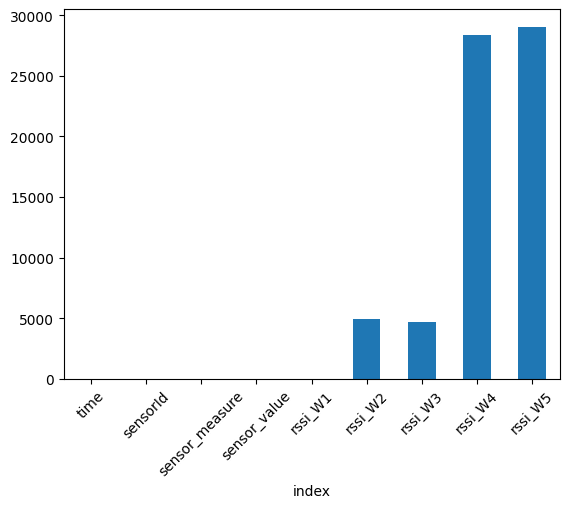

In [57]:
df_chr.isna()\
      .sum()\
      .reset_index(name= "n")\
      .plot.bar(x= 'index', y= 'n', rot= 45, legend= False);

In [178]:
df_chr.sensor_measure.unique()

array(['ComputedHeartrate', 'Cadence', 'GroundContactTime', 'Steps',
       'VerticalOscillation', 'Walking', 'GroundContactBalance',
       'StanceTime', 'VerticalRatio', 'TotalHbConcentration',
       'CurrentSaturatedHb', 'PreviousSaturatedHb', 'AmbientLightTooHigh'],
      dtype=object)

In [179]:
df_chr.groupby('sensor_measure')['sensor_value'].count()

sensor_measure
AmbientLightTooHigh     1817
Cadence                 3886
ComputedHeartrate        614
CurrentSaturatedHb      1817
GroundContactBalance    3886
GroundContactTime       3886
PreviousSaturatedHb     1817
StanceTime              3886
Steps                   3886
TotalHbConcentration    1817
VerticalOscillation     3886
VerticalRatio           3886
Walking                 3886
Name: sensor_value, dtype: int64

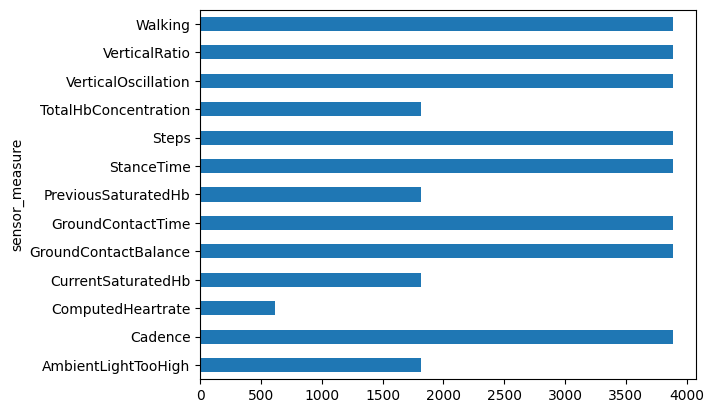

In [60]:
df_chr.groupby('sensor_measure')['sensor_value']\
      .count()\
      .plot.barh();

In [180]:
df_chr.groupby('sensor_measure').head()

,time,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.000000,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.000000,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.000000,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.000000,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.000000,-37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
31717,1.660895e+09,62ff3995354557bbc6718e7f,AmbientLightTooHigh,0.000000,-51,NaN,NaN,NaN,NaN
31718,1.660895e+09,62ff3995354557bbc6718e7f,TotalHbConcentration,12.580000,-51,NaN,NaN,NaN,NaN
31719,1.660895e+09,62ff3995354557bbc6718e7f,CurrentSaturatedHb,48.299999,-51,NaN,NaN,NaN,NaN
31720,1.660895e+09,62ff3995354557bbc6718e7f,PreviousSaturatedHb,48.000000,-51,NaN,NaN,NaN,NaN


### Create time features

The `time` feature corresponds to a Unix time stamp, *i.e.*, to the number of seconds since the 1st of January, 1970.

In [200]:
# create column with date-time
df_chr['dt'] = df_chr['time'].values\
                             .astype('datetime64[s]')\
                             .tolist() 
# df_chr['dt'] = pd.to_datetime(df_chr['time'], unit = 's')
# create column with time in HH:MM:SS format
# df_chr['localtime'] = pd.to_datetime(df_chr.dt).dt.time
# organise columns
time = df_chr.pop("time")
date_time = df_chr.pop("dt")
# local_time = df_chr.pop("localtime")
# df_chr.insert(0, "time", local_time)
df_chr.insert(0, "dt", date_time)
df_chr.insert(0, "time", time)
df_chr.head()

,time,dt,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,2022-08-19 07:45:13,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,2022-08-19 07:45:15,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


In [201]:
df_chr.to_csv("data/christos.csv")

In [202]:
df_chr= pd.read_csv("data/christos.csv", index_col= 0)
df_chr.head()

,time,dt,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,2022-08-19 07:45:13,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,2022-08-19 07:45:15,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


### Main data-frame

In [203]:
df_chr_main = df_chr[
  (df_chr.sensor_measure == 'ComputedHeartrate') |
  (df_chr.sensor_measure == 'Cadence') |
  (df_chr.sensor_measure == 'CurrentSaturatedHb')
]
df_chr_main.head()

,time,dt,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,2022-08-19 07:45:13,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,2022-08-19 07:45:15,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


In [204]:
df_chr_main.to_csv("data/christos-main.csv")

In [205]:
df_chr_main= pd.read_csv("data/christos-main.csv", index_col= 0)
df_chr_main.head()

,time,dt,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,2022-08-19 07:45:13,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,2022-08-19 07:45:15,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


In [227]:
df_chr_main['datet'] = pd.to_datetime(df_chr_main['time'], unit= 's')
df_chr_main.head()
# df.Data = pd.to_datetime(df.Date, format='%d/%m/%y')

,time,dt,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5,datet
0,1.660895e+09,2022-08-19 07:45:13,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN,2022-08-19 07:45:13.573999872
1,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN,2022-08-19 07:45:14.359000064
2,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN,2022-08-19 07:45:14.655000064
3,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN,2022-08-19 07:45:14.894000128
4,1.660895e+09,2022-08-19 07:45:15,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN,2022-08-19 07:45:15.607000064


In [224]:
df_chr_main.pop('datet')
df_chr_main.head()

,time,dt,sensorId,sensor_measure,sensor_value,rssi_W1,rssi_W2,rssi_W3,rssi_W4,rssi_W5
0,1.660895e+09,2022-08-19 07:45:13,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-39,NaN,NaN,NaN,NaN
1,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
2,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-35,NaN,NaN,NaN,NaN
3,1.660895e+09,2022-08-19 07:45:14,62fe42b6184ff6aec9ad538e,ComputedHeartrate,99.0,-43,NaN,NaN,NaN,NaN
4,1.660895e+09,2022-08-19 07:45:15,62fe42b6184ff6aec9ad538e,ComputedHeartrate,98.0,-37,NaN,NaN,NaN,NaN


In [209]:
print(
  len(df_chr_main[df_chr_main['sensor_measure'] == "ComputedHeartrate"]),
  len(df_chr_main[df_chr_main['sensor_measure'] == "Cadence"]),
  len(df_chr_main[df_chr_main['sensor_measure'] == "CurrentSaturatedHb"])
)

614 3886 1817


In [232]:
# import matplotlib.pyplot as plt

# fig, (axhr, axcd, axmx) = plt.subplots(3, sharex= True)
# plt.index
# axhr.plot(df_chr_main[df_chr_main['sensor_measure'] == "ComputedHeartrate"])
# axcd.plot(df_chr_main[df_chr_main['sensor_measure'] == "Cadence"])
# axmx.plot(df_chr_main[df_chr_main['sensor_measure'] == "CurrentSaturatedHb"])

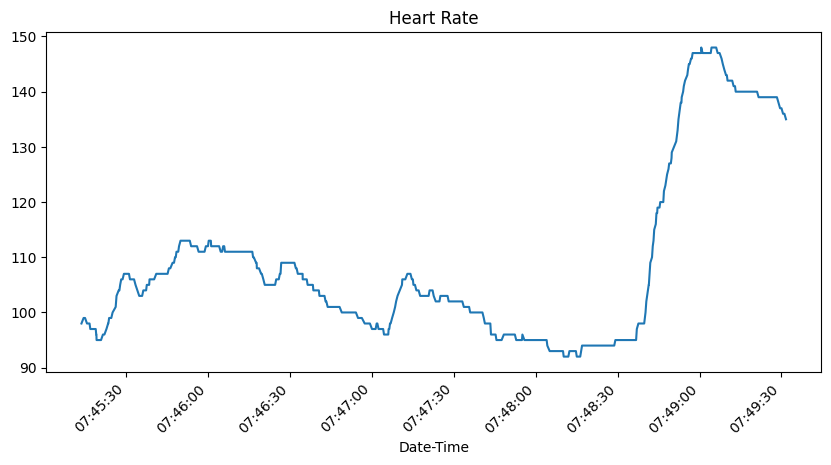

In [229]:
df4plt_hr = df_chr_main[df_chr_main['sensor_measure'] == "ComputedHeartrate"]
df4plt_hr.set_index('datet')\
         .plot(
          y= 'sensor_value',
          title= "Heart Rate",
          legend= False,
          figsize= (10, 5),
          rot = 45,
          xlabel= "Date-Time"
         );

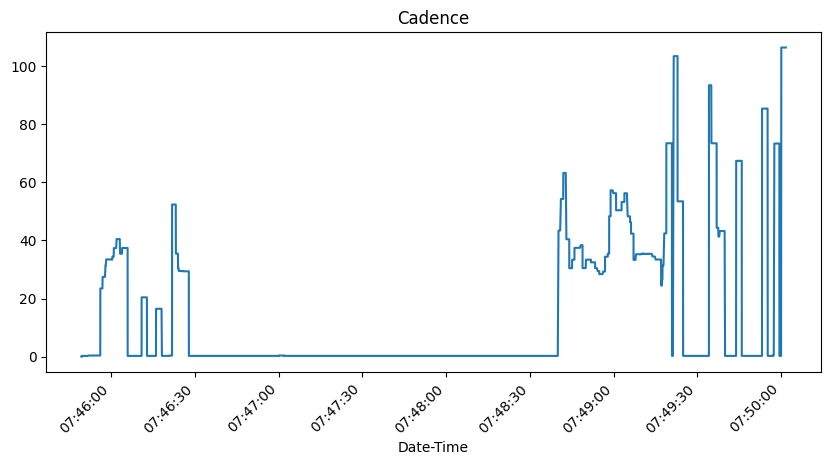

In [233]:
df4plt_cd = df_chr_main[df_chr_main['sensor_measure'] == "Cadence"]
df4plt_cd.set_index('datet')\
         .plot(
          y= 'sensor_value',
          title= "Cadence",
          legend= False,
          figsize= (10, 5),
          rot = 45,
          xlabel= "Date-Time"
         );

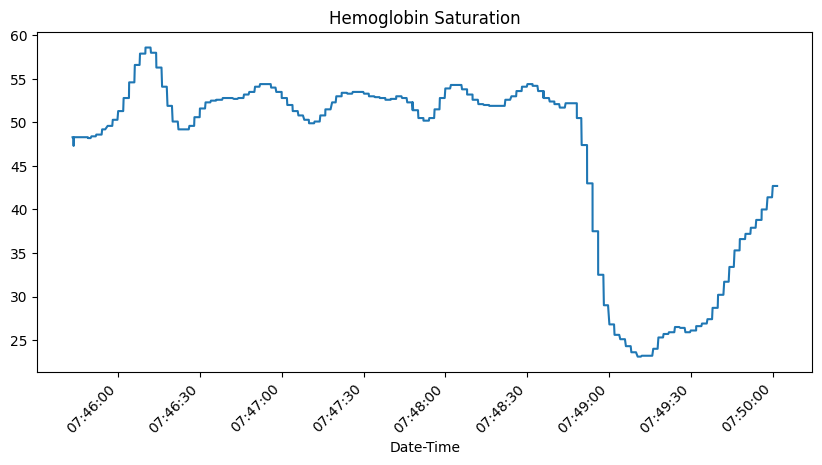

In [235]:
df4plt_mx = df_chr_main[df_chr_main['sensor_measure'] == "CurrentSaturatedHb"]
df4plt_mx.set_index('datet')\
         .plot(
          y= 'sensor_value',
          title= "Hemoglobin Saturation",
          legend= False,
          figsize= (10, 5),
          rot = 45,
          xlabel= "Date-Time"
         );


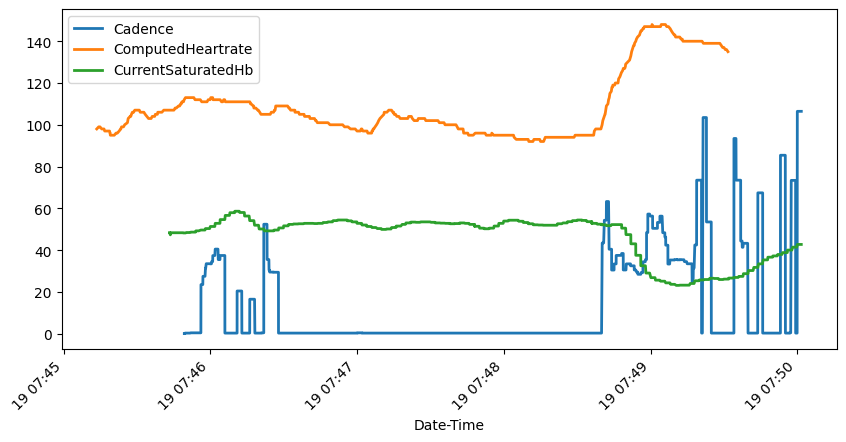

In [245]:
from datetime import datetime

df_chr_main.set_index('datet')\
           .groupby('sensor_measure')['sensor_value']\
           .plot(
              linewidth= 2,
              xlabel= "Date-Time",
              legend= True,
              figsize= (10, 5),
              rot = 45
            );

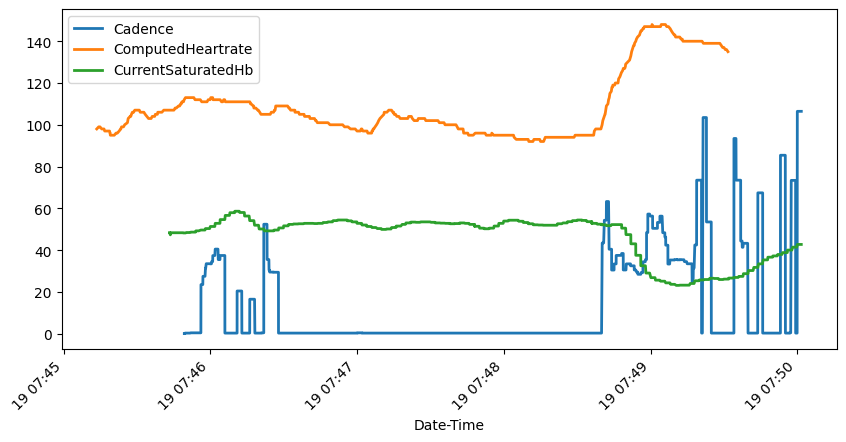

In [266]:
import matplotlib.dates as mdates
import matplotlib.patches as ptch

df4plt= df_chr_main.set_index('datet').groupby('sensor_measure')['sensor_value']
fig, ax, _ = df4plt.plot(
  linewidth= 2,
  xlabel= "Date-Time",
  legend= True,
  figsize= (10, 5),
  rot = 45
)

# start = mdates.date2num(df4plt['datet'][0])
# end = mdates.date2num(endTime)
# width = end - start

rect = ptch.Rectangle((2, 3), 10, 100, alpha = 0.5, ec = "gray", fc = "CornflowerBlue", visible = True)
ax.add_patch(rect)
plt.show();

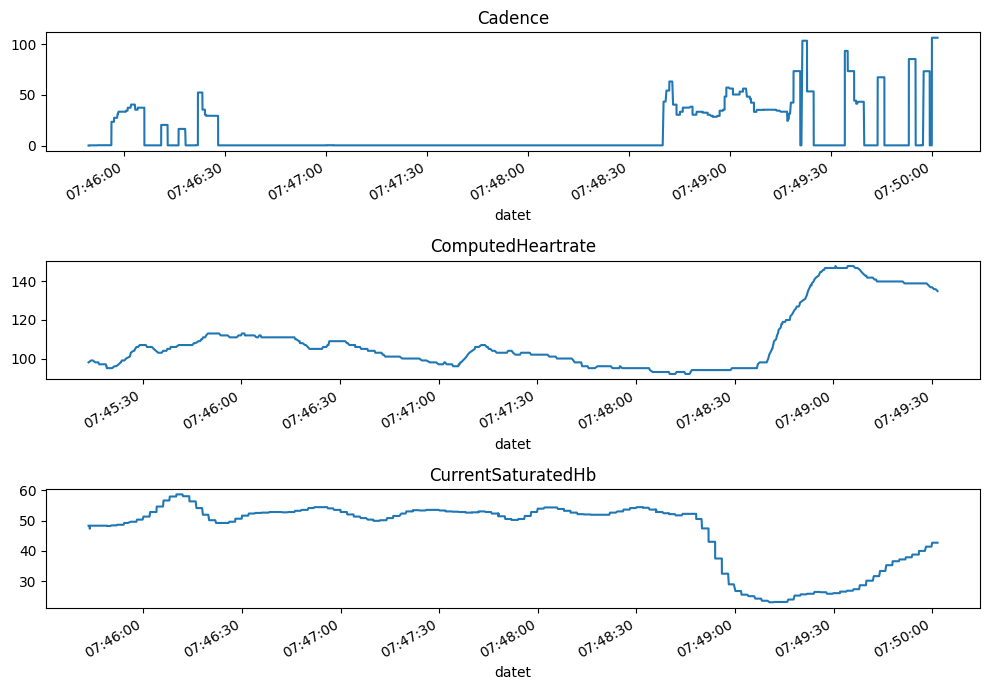

In [246]:
import matplotlib.pyplot as plt

chr_grps = df_chr_main.set_index('datet').groupby('sensor_measure')
fig, axs = plt.subplots(nrows= len(chr_grps), ncols= 1, figsize= (10, 7))

for ax, (i, sub) in zip(axs, chr_grps):
  sub['sensor_value'].plot(legend= False, title= i, ax= ax)

plt.tight_layout()
plt.show()
plt.clf()
plt.close()

In [247]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [ ]:
hr = df_chr_main[df_chr_main['sensor_measure'] == "ComputedHeartrate"]["sensor_value"].values
cad = df_chr_main[df_chr_main['sensor_measure'] == "Cadence"]["sensor_value"].values
time_hr = df_chr[df_chr['sensor_measure'] == "ComputedHeartrate"]['time'].values
time_cad = df_chr[df_chr['sensor_measure'] == "Cadence"]['time'].values
dt_hr = df_chr[df_chr['sensor_measure'] == "ComputedHeartrate"]['datetime'].values
dt_cad = df_chr[df_chr['sensor_measure'] == "Cadence"]['datetime'].values

I will smooth the HR curve, and will compute its first and second derivaties, as well as zeros and inflection points.

In [ ]:
# smooth heart rate
hr_sm = gaussian_filter1d(hr, 50)
# first derivative
hr_d1 = np.gradient(hr_sm)
# zeros
hr_zeros = np.where(np.diff(np.sign(hr_d1))) 
# second derivative
hr_d2 = np.gradient(hr_d1)
# inflection points
hr_inf = np.where(np.diff(np.sign(hr_d2))) 

In [ ]:
print("Zeros:", hr_zeros)
print("Inflection points:", hr_inf)

Zeros: (array([110, 382]),)
Inflection points: (array([ 52, 174, 257, 331, 490]),)


In [ ]:
# date-time in zeros
dt_hr[hr_zeros] 

array(['2022-08-19T07:46:32.894000128', '2022-08-19T07:48:36.768999936'],
      dtype='datetime64[ns]')

In [ ]:
# date-times in inflection points
dt_hr[hr_inf]

array(['2022-08-19T07:46:08.516000000', '2022-08-19T07:47:02.398000128',
       '2022-08-19T07:47:41.712000000', '2022-08-19T07:48:12.805000192',
       '2022-08-19T07:49:14.596000000'], dtype='datetime64[ns]')

In [ ]:
# first derivatives in inflection points
hr_d1[hr_inf] 

array([ 0.07194547, -0.07302376, -0.02490543, -0.06030385,  0.37592139])

In [ ]:
# index before maximum derivative
hr_idx = hr_inf[0][np.argmax(hr_d1[hr_inf]) - 1]

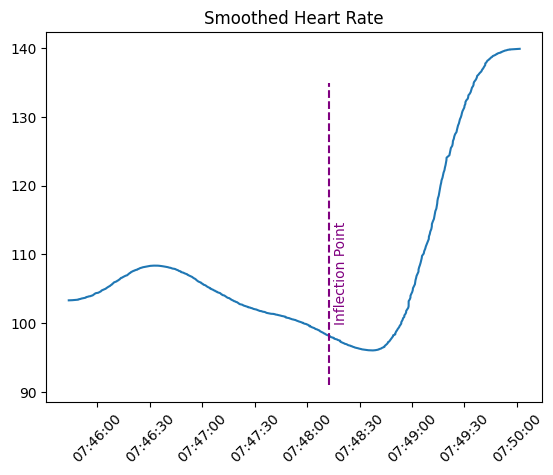

In [ ]:
# plot smoothed curve
# 
import matplotlib.pyplot as plt

plt.plot(dt_hr, hr_sm)
plt.vlines(
  dt_hr[hr_idx],
  ymin= min(hr_sm)-5, ymax= max(hr_sm)-5,
  linestyles= 'dashed',
  color= 'purple',
  label = "inflection point"
)
plt.annotate(
  "Inflection Point",
  (dt_hr[hr_idx + 5], hr_sm[hr_idx] + 2),
  rotation = 90,
  color = 'purple'
)
plt.xticks(rotation = 45)
plt.title("Smoothed Heart Rate");

In [ ]:
# time and date-time for hr_idx
print(time_hr[hr_idx])
print(dt_hr[hr_idx])

1660895292.805
2022-08-19T07:48:12.805000192


In [ ]:
# time stamps for the duration of the run
time_hr_start = time_hr[hr_idx] 
time_hr_end = time_hr_start + trip_times['chr'].values[0]
print("t0:", time_hr_start)
print("t:", time_hr_end)

# date-time for duration of run
from datetime import datetime

dt_hr_start = datetime.fromtimestamp(time_hr_start)
dt_hr_end = datetime.fromtimestamp(time_hr_end)

print("\nLook at the video between")
print(dt_hr_start)
print("and")
print(dt_hr_end)

t0: 1660895292.805
t: 1660895321.49

Look at the video between
2022-08-19 08:48:12.805000
and
2022-08-19 08:48:41.490000
